<link rel="stylesheet" href="fonts/css/font-awesome.min.css">
[А. Л.](https://capissimo.github.io/pythonfordatascience), 2021

https://capissimo.github.io/pythonfordatascience

## Глава 1. Статистика

### Содержание

- [Обследование данных](#Обследование-данных)
- [Исправление данных](#Исправление-данных)
- [Описательные статистики](#Описательные-статистики)
- [Группирование данных](#Группирование-данных)
- [Гистограммы](#Гистограммы)
- [Нормальное распределение](#Нормальное-распределение)
- [Булочник господина Пуанкаре](#Булочник-господина-Пуанкаре)
- [Асимметрия](#Асимметрия)
- [Способы сопоставительной визуализации](#Способы-сопоставительной-визуализации)
- [Важность визуализации](#Важность-визуализации)
- [Обработка столбцов](#Обработка-столбцов)
- [Сопоставительная визуализация электоральных данных](#Сопоставительная-визуализация-электоральных-данных)
- [Визуализация электоральных данных РФ](#Визуализация-электоральных-данных-РФ)
- [Сравнительная визуализация](#Сравнительная-визуализация)

<a name="home"></a>

In [72]:
# -*- coding: utf-8 -*-

# Системные библиотеки

import random
from collections import Counter

import scipy as sp
from scipy import stats
import pandas as pd  
# для загрузки файлов excel требуется xlrd >= 0.9.0 
# ?pip install --upgrade xlrd

# Графические настройки 

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family']     = 'sans-serif'
rcParams['font.sans-serif'] = ['Ubuntu Condensed']
rcParams['figure.figsize']  = (5, 4)
rcParams['legend.fontsize'] = 10
rcParams['xtick.labelsize'] = 9
rcParams['ytick.labelsize'] = 9

def saveplot(dest):
    plt.tight_layout()
    plt.savefig('images/' + dest) 

### Обследование данных

In [2]:
def load_uk():
    '''Загрузить данные по Великобритании'''
    return pd.read_excel('data/ch01/UK2010.xls')

In [3]:
def ex_1_1():
    '''Получить имена полей кадра данных'''
    return load_uk().columns

ex_1_1()

Index(['Press Association Reference', 'Constituency Name', 'Region',
       'Election Year', 'Electorate', 'Votes', 'AC', 'AD', 'AGS', 'APNI',
       ...
       'UKIP', 'UPS', 'UV', 'VCCA', 'Vote', 'Wessex Reg', 'WRP', 'You',
       'Youth', 'YRDPL'],
      dtype='object', length=144)

In [4]:
def ex_1_2():
    '''Получить значения поля "Год выборов"'''
    return load_uk()['Election Year']  #[-5:] или tail() # последние 5 строк

ex_1_2()

0      2010.0
1      2010.0
2      2010.0
3      2010.0
4      2010.0
5      2010.0
6      2010.0
7      2010.0
8      2010.0
9      2010.0
10     2010.0
11     2010.0
12     2010.0
13     2010.0
14     2010.0
15     2010.0
16     2010.0
17     2010.0
18     2010.0
19     2010.0
20     2010.0
21     2010.0
22     2010.0
23     2010.0
24     2010.0
25     2010.0
26     2010.0
27     2010.0
28     2010.0
29     2010.0
        ...  
621    2010.0
622    2010.0
623    2010.0
624    2010.0
625    2010.0
626    2010.0
627    2010.0
628    2010.0
629    2010.0
630    2010.0
631    2010.0
632    2010.0
633    2010.0
634    2010.0
635    2010.0
636    2010.0
637    2010.0
638    2010.0
639    2010.0
640    2010.0
641    2010.0
642    2010.0
643    2010.0
644    2010.0
645    2010.0
646    2010.0
647    2010.0
648    2010.0
649    2010.0
650       NaN
Name: Election Year, dtype: float64

In [4]:
def ex_1_3():
    '''Получить значения в поле "Год выборов" без дубликатов'''
    return load_uk()['Election Year'].unique()

ex_1_3()

array([2010.,   nan])

In [5]:
def ex_1_4():
    '''Рассчитать частоты в поле "Год выборов" 
       (количества появлений разных значений)'''
    return Counter( load_uk()['Election Year'] )

ex_1_4()

Counter({2010.0: 650, nan: 1})

### Исправление данных

In [6]:
def ex_1_5():
    '''Вернуть отфильтрованную по полю "Год выборов" 
       запись в кадре данных (в виде словаря)'''
    df = load_uk()
    return df[df['Election Year'].isnull()]

ex_1_5()

,Press Association Reference,Constituency Name,Region,Election Year,Electorate,Votes,AC,AD,AGS,APNI,...,UKIP,UPS,UV,VCCA,Vote,Wessex Reg,WRP,You,Youth,YRDPL
650,NaN,NaN,NaN,NaN,NaN,29687604,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Описательные статистики

In [7]:
def load_uk_scrubbed():
    '''Загрузить и отфильтровать данные по Великобритании'''
    df = load_uk()
    return df[df['Election Year'].notnull()]       

In [8]:
def ex_1_6():
    '''Число значений в поле "Электорат"'''
    return load_uk_scrubbed()['Electorate'].count() 

ex_1_6() 

650

*Среднее значение*

In [9]:
def mean(xs): 
    '''Среднее значение числового ряда'''
    return sum(xs) / len(xs)

In [10]:
def ex_1_7():
    '''Вернуть среднее значение поля "Электорат"'''
    # как вариант, mean(load_uk_scrubbed()['Electorate'])
    return load_uk_scrubbed()['Electorate'].mean()

ex_1_7()

70149.94

*Медиана*

In [11]:
def median(xs):
    '''Медиана числового ряда'''
    n = len(xs)
    mid = n // 2

    if n % 2 == 1:
        return sorted(xs)[mid]
    else:
        return mean( sorted(xs)[mid-1:][:2] ) 

In [12]:
def ex_1_8():
    '''Вернуть медиану поля "Электорат"'''
    # как вариант, median(load_uk_scrubbed()['Electorate'])
    return load_uk_scrubbed()['Electorate'].median()

ex_1_8()

70813.5

*Дисперсия*

In [13]:
def variance(xs):
    '''Дисперсия числового ряда,
       несмещенная дисперсия при n <= 30'''
    x_hat = mean(xs)
    n = len(xs)
    n = n - 1 if n in range(1, 30) else n  
    square_deviation = lambda x : (x - x_hat) ** 2 
    return sum( map(square_deviation, xs) ) / n

def standard_deviation(xs):
    '''Стандартное отклонение числового ряда'''
    return sp.sqrt( variance(xs) )

In [14]:
# метод s.std() в pandas по умолчанию вычисляет несмещенное 
# значение, т.е. нормализует на n-1 (ddof=1 по умолчанию). 
# Чтобы задать смещенное вычисление, нужно указать ddof=0

def ex_1_9():
    '''Стандартное отклонение поля "Электорат"'''
    # как вариант, standard_deviation(load_uk_scrubbed()['Electorate'])
    return load_uk_scrubbed()['Electorate'].std(ddof=0)  # смещенное значение

ex_1_9() 

7672.772645446216

*Квантили*

In [15]:
def quantile(p, xs):       
    '''Вычислить квантили:
       возвращает значение в последовательности xs, 
       соответствующее p-ому проценту'''
    # как вариант,
    # series = load_uk_scrubbed()['Electorate']
    # fn = lambda x: quantile(x, series)   
    # return list( map( fn, [0, 1/4, 1/2, 3/4, 1] ) )
    n = xs.count()-1
    return xs.sort_values().iloc[int(n * p + 1/2)]  

In [16]:
def ex_1_10():
    '''Получить квантили поля "Электорат"'''
    q = [0, 1/4, 1/2, 3/4, 1]
    # как вариант, quantile(q, load_uk_scrubbed()['Electorate'])
    return load_uk_scrubbed()['Electorate'].quantile(q=q)

ex_1_10()

0.00     21780.00
0.25     65929.25
0.50     70813.50
0.75     74948.50
1.00    109922.00
Name: Electorate, dtype: float64

In [17]:
# Резумирующая статистическая информация по полю "Электорат"

load_uk_scrubbed()['Electorate'].describe()

count       650.000000
mean      70149.940000
std        7678.681597
min       21780.000000
25%       65929.250000
50%       70813.500000
75%       74948.500000
max      109922.000000
Name: Electorate, dtype: float64

### Группирование данных

In [18]:
def nbin(n, xs): 
    '''Группирование данных в частотные корзины'''
    min_x, max_x = min(xs), max(xs)
    range_x = max_x - min_x
    fn = lambda x: min(int((abs(x) - min_x) / range_x * n), n-1) 
    return map(fn, xs)

list( nbin(5, range(15)) )

[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4]

In [19]:
def ex_1_11_custom():
    '''Сгруппировать электорат Великобритании 
       в 5 частотных корзин (собственная имплементация)'''
    series = load_uk_scrubbed()['Electorate']
    return Counter(nbin(5, series))

ex_1_11_custom() 

Counter({1: 26, 2: 450, 3: 171, 4: 1, 0: 2})

In [20]:
def ex_1_11():
    '''Сгруппировать электорат Великобритании 
       в 5 частотных корзин (средствами pandas)'''
    series = load_uk_scrubbed()['Electorate']
    return pd.value_counts(pd.cut(series, bins=5, labels=False))
    
ex_1_11()

2    450
3    171
1     26
0      2
4      1
Name: Electorate, dtype: int64

### Гистограммы

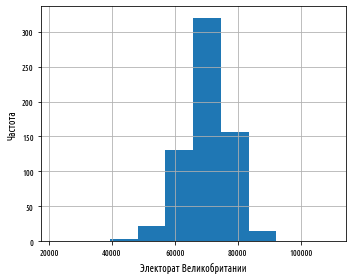

In [93]:
def ex_1_12():
    '''Построить гистограмму частотных корзин 
       электората Великобритании'''
    load_uk_scrubbed()['Electorate'].hist()
    plt.xlabel('Электорат Великобритании')
    plt.ylabel('Частота')
    saveplot('ex_1_12.png')  
    plt.show()    
    
ex_1_12()

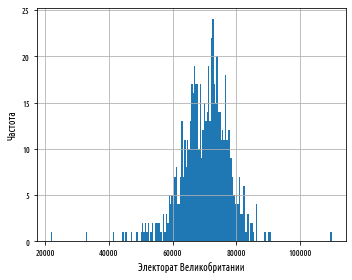

In [94]:
def ex_1_13():
    '''Построить гистограмму частотных корзин 
       электората Великобритании с 200 корзинами'''
    load_uk_scrubbed()['Electorate'].hist(bins=200)
    plt.xlabel('Электорат Великобритании')
    plt.ylabel('Частота')
    saveplot('ex_1_13.png')  
    plt.show() 
    
ex_1_13()

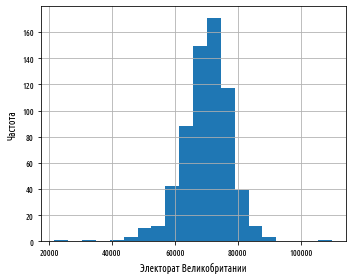

In [95]:
def ex_1_14():
    '''Построить гистограмму частотных корзин 
       электората Великобритании с 20 корзинами'''
    load_uk_scrubbed()['Electorate'].hist(bins=20)
    plt.xlabel('Электорат Великобритании')
    plt.ylabel('Частота')
    saveplot('ex_1_14.png')  
    plt.show() 
    
ex_1_14()

### Нормальное распределение

*Центральная предельная теорема*

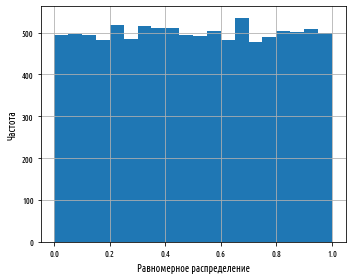

In [96]:
def ex_1_15():
    '''Показать гистограмму равномерного распределения 
       синтетического набора данных'''
    # как вариант, xs = [random.uniform(0, 1) for _ in range(10000)]
    xs = stats.uniform.rvs(0, 1, 10000)
    pd.Series(xs).hist(bins=20)
    plt.xlabel('Равномерное распределение')
    plt.ylabel('Частота')
    saveplot('ex_1_15.png')              
    plt.show()
    
ex_1_15()

In [39]:
def bootstrap(xs, n, replace=True): 
    '''Вернуть список массивов меньших размеров 
       по n элементов каждый'''
    return sp.random.choice(xs, (len(xs), n), replace=replace) 

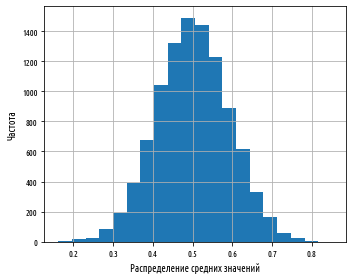

In [97]:
def ex_1_16():
    '''Построить гистограмму средних значений'''
    # как вариант, xs = [random.gauss(0, 1) for _ in range(10000)]
    xs = stats.uniform.rvs(loc=0, scale=1, size=10000) 
    pd.Series( map(sp.mean, bootstrap(xs, 10)) ).hist(bins=20)  
    plt.xlabel('Распределение средних значений') 
    plt.ylabel('Частота')
    saveplot('ex_1_16.png')              
    plt.show()

ex_1_16()

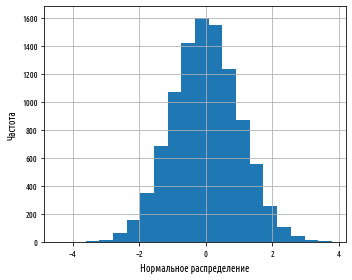

In [98]:
def ex_1_17():
    '''Показать гистограмму нормального распределения 
       синтетического набора данных'''
    # как вариант, xs = [random.gauss(0, 1) for _ in range(10000)]
    xs = stats.norm.rvs(loc=0, scale=1, size=10000) 
    pd.Series(xs).hist(bins=20)
    plt.xlabel('Нормальное распределение')
    plt.ylabel('Частота')
    saveplot('ex_1_17.png')               
    plt.show()

ex_1_17()

### Булочник господина Пуанкаре

*Генерирование распределений*

In [42]:
def honest_baker(loc, scale): # среднее и дисперсия
    '''Модель честного булочника'''
    # как вариант, [random.gauss(loc, scale) for _ in range(10000)]
    return pd.Series( stats.norm.rvs(loc, scale, size=10000) )

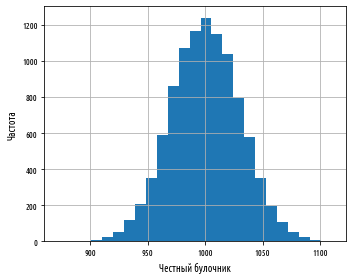

In [99]:
def ex_1_18():
    '''Смоделировать честного булочника на гистограмме'''
    honest_baker(1000, 30).hist(bins=25)
    plt.xlabel('Честный булочник') 
    plt.ylabel('Частота')
    saveplot('ex_1_18.png')               
    plt.show()

ex_1_18()

In [44]:
def dishonest_baker( loc, scale ):
    '''Модель нечестного булочника'''
    xs = stats.norm.rvs(loc, scale, size=10000) 
    return pd.Series( map(max, bootstrap(xs, 13)) )  # взять макс. в каждой подгруппе    

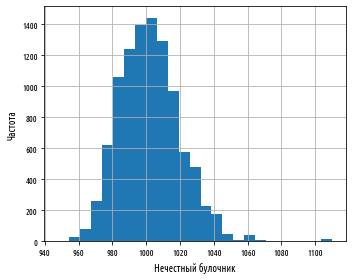

In [100]:
def ex_1_19():
    '''Смоделировать нечестного булочника на гистограмме'''
    dishonest_baker(950, 30).hist(bins=25)
    plt.xlabel('Нечестный булочник') 
    plt.ylabel('Частота')
    saveplot('ex_1_19.png')               
    plt.show()

ex_1_19()

### Асимметрия

In [113]:
def ex_1_20():
    '''Получить коэффициент асимметрии нормального распределения'''
    s = dishonest_baker(950, 30)
    return { 'среднее'   : s.mean(), 
             'медиана'   : s.median(), 
             'асимметрия': s.skew() }

ex_1_20()

{'среднее': 999.2718614591498,
 'медиана': 997.834591527114,
 'асимметрия': 0.42804223875476605}

*Графики нормального распределения*

In [47]:
def qqplot(xs):
    '''Квантильный график (график квантиль-квантиль, Q-Q plot)'''
    d = {0:sorted(stats.norm.rvs(loc=0, scale=1, size=len(xs))), 
         1:sorted(xs)}
    pd.DataFrame(d).plot.scatter(0, 1, s=5, grid=True)
    plt.xlabel('Квантили теоретического нормального распределения')
    plt.ylabel('Квантили данных')
    plt.title ('Квантильный график', fontweight='semibold')

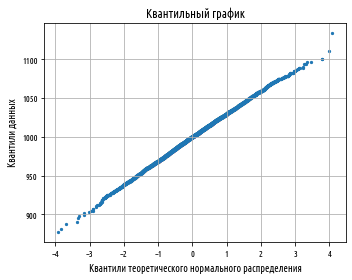

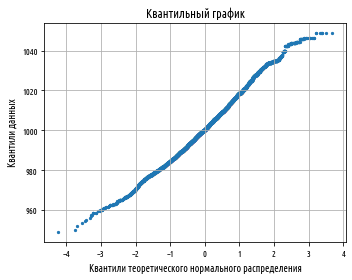

In [101]:
def ex_1_21():
    '''Показать квантильные графики 
       для честного и нечестного булочников'''
    qqplot( honest_baker(1000, 30) )  
    saveplot('ex_1_21_1.png')
    plt.show()
    qqplot( dishonest_baker(950, 30) )
    saveplot('ex_1_21_2.png')
    plt.show()
    
ex_1_21()

### Способы сопоставительной визуализации

*Коробчатые диаграммы*

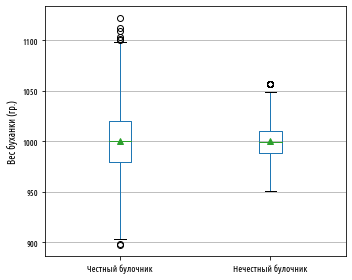

In [102]:
def ex_1_22():
    '''Показать коробчатую диаграмму
       с данными честного и нечестного булочников'''
    d = {'Честный булочник'  :honest_baker(1000, 30),
         'Нечестный булочник':dishonest_baker(950, 30)} 
    pd.DataFrame(d).boxplot(sym='o', whis=1.95, showmeans=True)
    plt.ylabel('Вес буханки (гр.)')
    plt.gca().xaxis.grid(False)
    saveplot('ex_1_22.png')              
    plt.show()

ex_1_22()

*Интегральные (кумулятивные) функции распределения*

In [50]:
def empirical_cdf(x):
    """Вернуть эмпирическую ИФР для x"""
    sx  = sorted(x)
    return pd.DataFrame( {0: sx, 1:sp.arange(len(sx))/len(sx)} )

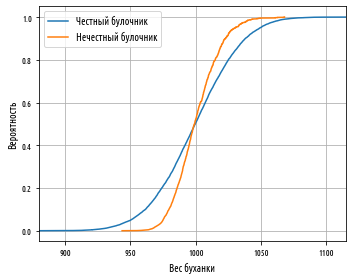

In [103]:
def ex_1_23():
    '''Показать графики эмпирической ИФР
       честного булочника в сопоставлении с нечестным'''
    df  = empirical_cdf(honest_baker(1000, 30))
    df2 = empirical_cdf(dishonest_baker(950, 30))
    ax  = df.plot(0, 1, label='Честный булочник')    
    df2.plot(0, 1, label='Нечестный булочник', grid=True, ax=ax)    
    plt.xlabel('Вес буханки')
    plt.ylabel('Вероятность')
    plt.legend(loc='best')
    saveplot('ex_1_23.png')               
    plt.show()  
    
ex_1_23()

### Важность визуализации

*Визуализация данных об электорате*

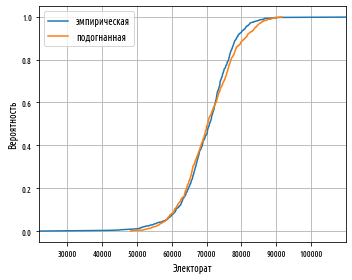

In [104]:
def ex_1_24():
    '''Показать эмпирическую и подогнанную ИФР 
       электората Великобритании'''
    emp      = load_uk_scrubbed()['Electorate']
    fitted   = stats.norm.rvs(emp.mean(), emp.std(ddof=0), len(emp))
    df  = empirical_cdf(emp)
    df2 = empirical_cdf(fitted)
    ax  = df.plot(0, 1, label='эмпирическая')    
    df2.plot(0, 1, label='подогнанная', grid=True, ax=ax)    
    plt.xlabel('Электорат')
    plt.ylabel('Вероятность')
    plt.legend(loc='best')
    saveplot('ex_1_24.png')               
    plt.show()   
    
ex_1_24()

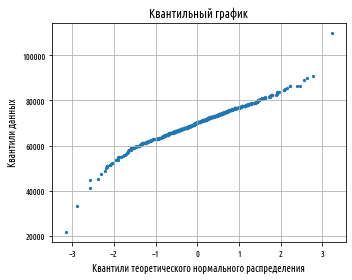

In [105]:
def ex_1_25():
    '''Показать квантильный график 
       электората Великобритании'''
    qqplot(load_uk_scrubbed()['Electorate'])
    saveplot('ex_1_25.png')
    plt.show()
    
ex_1_25()

### Обработка столбцов

*Добавление производных столбцов*

In [54]:
'''Операции над столбцами'''

# сгенерировать синтетический кадр данных
sp.random.seed(0)
df = pd.DataFrame(sp.random.randn(3, 2), columns=['A', 'B'])

# заменить все значения в столбце новым значением 
df['A'] = 1

# заменить все значения в столбце новой последовательностью 
df['A'] = pd.Series(sp.random.randn(5))

# заменить все значения в столбце, применив функцию 
df['A'] = df.apply(lambda x: max(x['A'], x['B']), axis=1) # применить вертикально

# заменить значение в заданной позиции столбца
df['A'][2] = 1

# добавить производный столбец на основе существующих 
df['C'] = df['A'] + df['B']

# добавить производный столбец путем применения функции 
df['D'] = df.apply(lambda x: min(x['A'], x['B']), axis=1) 

df

,A,B,C,D
0,0.950088,0.400157,1.350246,0.400157
1,2.240893,2.240893,4.481786,2.240893
2,1.000000,-0.977278,0.022722,-0.977278


### Сопоставительная визуализация электоральных данных

In [55]:
def ex_1_26():
    '''Вычислить производное поле данных "Победители" и 
       число имеющихся в нем пропущенных значений'''
    df = load_uk_scrubbed()
    df['Победители'] = df['Con'] + df['LD']
    freq = Counter(df['Con'].apply( lambda x: x > 0 ))
    print('Поле "Победители": %d, в т.ч. пропущено %d' 
          % (freq[True], freq[False]))

ex_1_26()

Поле "Победители": 631, в т.ч. пропущено 19


In [56]:
'''Проверить пропущенные значения в полях
   "Консервативная партия" (Con) и 
   "Либерально-демократическая партия" (LD)'''
df = load_uk_scrubbed()
Counter(df['Con'].apply(lambda x: x > 0)), Counter(df['LD'].apply(lambda x: x > 0))

(Counter({True: 631, False: 19}), Counter({True: 631, False: 19}))

In [57]:
def ex_1_27():
    '''Выборка полей данных по условию, что поля
       "Консервативная партия" (Con) и 
       "Либерально-демократическая" (LD) не пустые'''
    df   = load_uk_scrubbed()
    rule = df['Con'].isnull() & df['LD'].isnull()
    return df[rule][['Region', 'Electorate', 'Con', 'LD']]
    
ex_1_27()

,Region,Electorate,Con,LD
12,Northern Ireland,60204.0,NaN,NaN
13,Northern Ireland,73338.0,NaN,NaN
14,Northern Ireland,63054.0,NaN,NaN
44,Northern Ireland,59007.0,NaN,NaN
45,Northern Ireland,65504.0,NaN,NaN
46,Northern Ireland,59524.0,NaN,NaN
47,Northern Ireland,59522.0,NaN,NaN
107,South East,74989.0,NaN,NaN
201,Northern Ireland,60698.0,NaN,NaN
202,Northern Ireland,70784.0,NaN,NaN


In [58]:
# Доля победителя = Голоса за победителя / действительные бюллетени
# Явка = Действительные бюллетени / число избирателей
# где:
#   Голоса за победителя - число голосов, отданных за победителя
#   Действительные бюллетени - число действительных избирательных бюллетеней
#   Число избирателей - число избирателей, включенных в список избирателей

def load_uk_victors():
    '''Загрузить данные по Великобритании, 
       выбрать поля и отфильтровать'''
    df   = load_uk_scrubbed()
    rule = df['Con'].notnull()
    df   = df[rule][['Con', 'LD', 'Votes', 'Electorate']] 
    df['Победители']       = df['Con']        + df['LD'] 
    df['Доля победителей'] = df['Победители'] / df['Votes'] 
    df['Явка']             = df['Votes']      / df['Electorate']
    return df

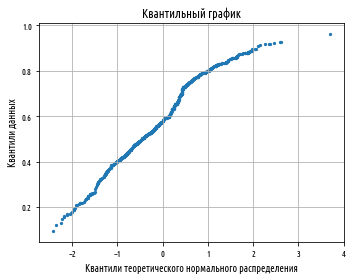

In [106]:
def ex_1_28():
    '''Показать квантильный график победителей 
       на выборах в Великобритании'''
    qqplot(load_uk_victors()['Доля победителей'])
    saveplot('ex_1_28.png')
    plt.show()
    
ex_1_28()    

In [60]:
def load_ru():
    '''Загрузить данные по России'''
    return pd.read_csv('data/ch01/Russia2011.tsv', '\t')
    #return pd.read_excel('data/ch01/Russia2011.xlsx') # медленно

In [61]:
def ex_1_29():
    '''Показать список полей электоральных 
       данных по России'''
    return load_ru().columns

ex_1_29() 

Index(['Код ОИК', 'ОИК №', 'Имя участка',
       'Число избирателей, внесенных в список избирателей',
       'Число избирательных бюллетеней, полученных участковой избирательной комиссией',
       'Число избирательных бюллетеней, выданных избирателям, проголосовавшим досрочно',
       'Число избирательных бюллетеней, выданных избирателям в помещении для голосования',
       'Число избирательных бюллетеней, выданных избирателям вне помещения для голосования',
       'Число погашенных избирательных бюллетеней',
       'Число избирательных бюллетеней в переносных ящиках для голосования',
       'Число избирательных бюллетеней в стационарных ящиках для голосования',
       'Число недействительных избирательных бюллетеней',
       'Число действительных избирательных бюллетеней',
       'Число открепительных удостоверений, полученных участковой избирательной комиссией',
       'Число открепительных удостоверений, выданных избирателям на избирательном участке',
       'Число избирателей, прог

### Визуализация электоральных данных РФ

In [62]:
# Доля победителя = Голоса за победителя / действительные бюллетени
# Явка = Действительные бюллетени / число избирателей

def load_ru_victors():
    '''Загрузить данные по России, 
       выбрать, переименовать и вычислить поля'''
    new_cols_dict = {
        'Число избирателей, внесенных в список избирателей':'Электорат',
        'Число действительных избирательных бюллетеней':'Действительные бюллетени',
        'Политическая партия "ЕДИНАЯ РОССИЯ"':'Победитель'
        }
    newcols = list(new_cols_dict.values())    
    df = load_ru().rename( columns=new_cols_dict )[newcols]  
    df['Доля победителя'] = df['Победитель'] / df['Действительные бюллетени']  
    df['Явка']            = df['Действительные бюллетени'] / df['Электорат']              
    return df   

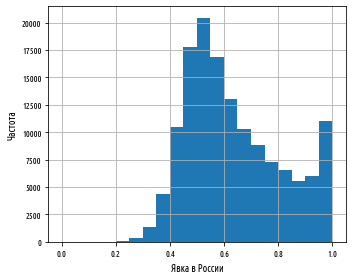

In [107]:
def ex_1_30():
    '''Показать гистограмму 
       электоральных данных по России'''
    load_ru_victors()['Явка'].hist(bins=20)
    plt.xlabel('Явка в России') 
    plt.ylabel('Частота')
    saveplot('ex_1_30.png')
    plt.show()
    
ex_1_30()

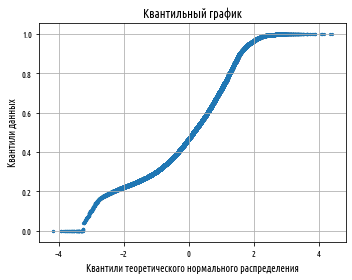

In [108]:
def ex_1_31():
    '''Показать квантильный график 
       победителя на выборах в РФ'''
    qqplot( load_ru_victors()['Доля победителя'].dropna() )
    saveplot('ex_1_31.png')
    plt.show()
    
ex_1_31()

### Сравнительная визуализация

*Функции массы вероятности*

In [65]:
def plot_as_pmf(dt, label, ax):
    '''График функции вероятности дискретной случайной величины
       (или функции массы вероятности)'''
    # разбить на 40 частотных корзин
    s   = pd.cut(dt, bins=40, labels=False)       
    # подсчитать кво элементов в корзинах и разделить на общее кво
    pmf = s.value_counts().sort_index() / len(s)  
    newax = pmf.plot(label=label, grid=True, ax=ax)   
    return newax

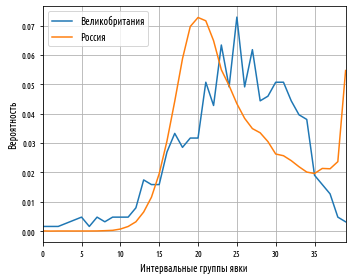

In [109]:
def ex_1_32():
    '''Сопоставление данных явки по Великобритании и РФ,
       данные нормализованы на основе функции массы вероятностей'''
    ax = plot_as_pmf(load_uk_victors()['Явка'], 'Великобритания', None)
    plot_as_pmf(load_ru_victors()['Явка'], 'Россия', ax)
    plt.xlabel('Интервальные группы явки')
    plt.ylabel('Вероятность')
    plt.legend(loc='best')
    saveplot('ex_1_32.png')    
    plt.show()
    
ex_1_32()

In [67]:
'''Сравнение средних явок по Великобритании и РФ'''
load_uk_victors()['Явка'].mean(), load_ru_victors()['Явка'].mean()

(0.6523165278460623, 0.6366933778143105)

*Точечные графики (диаграммы рассеяния)*

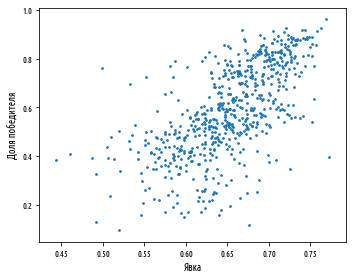

In [110]:
def ex_1_33():
    '''Показать диаграмму рассеяния 
       выборов в Великобритании'''
    df = load_uk_victors()[ ['Явка', 'Доля победителей'] ]
    df.plot.scatter(0, 1, s=3)
    plt.xlabel('Явка')
    plt.ylabel('Доля победителя')
    saveplot('ex_1_33.png')
    plt.show()
    
ex_1_33()

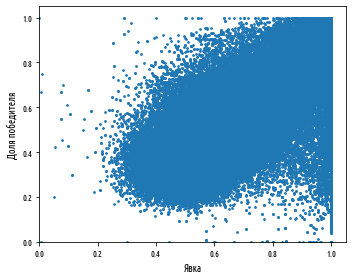

In [111]:
def ex_1_34():
    '''Показать диаграмму рассеяния выборов в РФ'''
    df = load_ru_victors()[ ['Явка', 'Доля победителя'] ]
    df.plot.scatter(0, 1, s=3)
    plt.xlabel('Явка')
    plt.ylabel('Доля победителя')
    plt.axis([0, 1.05, 0, 1.05])
    saveplot('ex_1_34.png')
    plt.show()
    
ex_1_34()

*Настройка прозрачности разброса*

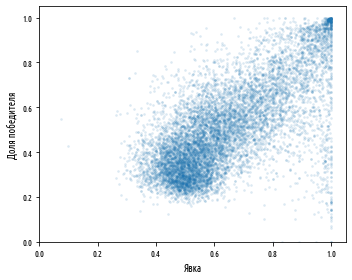

In [112]:
def ex_1_35():
    '''Показать диаграмму рассеяния (с прозрачностью) выборов в РФ'''
    df = load_ru_victors()[ ['Явка', 'Доля победителя'] ]
    rows = sp.random.choice(df.index.values, 10000)
    df.loc[rows].plot.scatter(0, 1, s=3, alpha=0.1)
    plt.xlabel('Явка')
    plt.ylabel('Доля победителя')
    plt.axis([0, 1.05, 0, 1.05])
    saveplot('ex_1_35.png')
    plt.show()
    
ex_1_35()

<a href="#home"><i class="fa fa-home fa-fw"></i></a><br><br>